<center><h2>Text Mining using Python<br></h2></center>

On this lab we will see techniques for feature extraction and transformation on textual data in the context of data mining and analysis. In particular we will cover in a toy example the concepts of:

- TF-IDF
- Stopwords
- Stemming
- LSA

After we will apply these techniques on the topic of *opinion mining* (also known as *sentiment analysis*) which is the application of text mining techniques for text classification with classes having the contextual meaning of *positive* or *negative* (or a degree in between).


Finally we will explore the advance feature extraction model of "Graph of words"

#### Toy Data

In [1]:
import math
doc1 = """Python is a 2000 made-for-TV horror movie directed by Richard
Clabaugh. The film features several cult favorite actors, including William
Zabka of The Karate Kid fame, Wil Wheaton, Casper Van Dien, Jenny McCarthy,
Keith Coogan, Robert Englund (best known for his role as Freddy Krueger in the
A Nightmare on Elm Street series of films), Dana Barron, David Bowe, and Sean
Whalen. The film concerns a genetically engineered snake, a python, that
escapes and unleashes itself on a small town. It includes the classic final
girl scenario evident in films like Friday the 13th. It was filmed in Los Angeles,
 California and Malibu, California. Python was followed by two sequels: Python
 II (2002) and Boa vs. Python (2004), both also made-for-TV films."""

doc2 = """ Python is a very nice programming programming programming language
language language language used by many researchers, engineers and data scientists."""

doc3 = """The Colt Python is a .357 Magnum caliber revolver formerly
manufactured by Colt's Manufacturing Company of Hartford, Connecticut.
It is sometimes referred to as a "Combat Magnum".[1] It was first introduced
in 1955, the same year as Smith &amp; Wesson's M29 .44 Magnum. The now discontinued
Colt Python targeted the premium revolver market segment. Some firearm
collectors and writers such as Jeff Cooper, Ian V. Hogg, Chuck Hawks, Leroy
Thompson, Renee Smeets and Martin Dougherty have described the Python as the
finest production revolver ever made."""


collection = [doc1, doc2, doc3]
collection =[x.split(' ') for x in collection]

##### TF-IDF

For a quick remider :

The importance of a word in a collection is:

$$ idf(t, \mathcal{D}) = \log \frac{m}{| \{d \in \mathcal{D} : t \in d |\} } $$

where $d$ is a document and  $m$ is the total number of documents  in collection $\mathcal{D}$, and the denominator captures the number of documents that term $t$ appears. 

And the importance of a word in a document:

$$ tf(t,d) =  \frac{\mathcal{f_{t,d}}}{\sum{t'\notin d}{\mathcal{f_{t',d}}}}  $$

Where $\mathcal{f_{t,d}}$ is the raw count of a term $t$ in a document $d$.

We combine the two into TF-IF:


$$ tf\text{-}idf(t,d,\mathcal{D}) = tf(t,d) \times idf(t, \mathcal{D}) $$

In [6]:
def tf(word, doc):
    count=doc.count(word) # Count the word in the doc list
    return count/len(doc)

def idf(word, collection):
    count_coll=0
    for doc in collection:
        if word in doc : count_coll+=1
    return math.log(len(collection)/count_coll) + 1

def tfidf(word, doc, collection):
    return tf(word,doc)*idf(word,collection)


In [7]:
#print most 4 top important words per doc
for i,doc in enumerate(collection):
    important=[]
    for word in set(doc):
        
            important.append((word,tfidf(word,doc,collection)))
    important=sorted(important,key=lambda x:x[1])[::-1]
    print (important[0:4])
    print("------------------")

[('in', 0.054746407530472434), ('The', 0.03666430716803907), ('made-for-TV', 0.03649760502031496), ('film', 0.03649760502031496)]
------------------
[('programming', 0.3147918433002165), ('language', 0.20986122886681102), ('very', 0.10493061443340551), ('nice', 0.10493061443340551)]
------------------
[('revolver', 0.07969413754435861), ('as', 0.0711627902839577), ('the', 0.05337209271296827), ('Python', 0.0379746835443038)]
------------------


###### Stopwords and Stemming

- Stopwords: Words naturally frequent in a language (or within a collection)
- Stemming : the root form of a word

In [8]:
import nltk
#nltk.download()
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [11]:
stemmer=SnowballStemmer("english") # could use : PorterStemmer
stopW = stopwords.words("english")
for word in set(collection[1]):
        #if word not in list(stopW) : 
            print (word+"\t"+stemmer.stem(word))
# Stemmer : some transformation to convert words based on rules (as remove 'ed', replace 'ry' by 'ri')
#print(stemmer.stem("tested"))

	
Python	python
and	and
data	data
programming	program
by	by
is	is
language
language	language
languag
language	languag
a	a
engineers	engin
scientists.	scientists.
many	mani
used	use
researchers,	researchers,
nice	nice
very	veri
ashfhfkhdsvf


In [13]:
# list of StopWords
stopW

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

##### TF-IDF Matrix

With TF-IDF we can view our collection as matrix that has $|D|$ rows and $|t|$ collumns :

<img src='figures/tfidf_matrix.png'>

Where $w_{i,j}$ is the tf-idf value.


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

documents = ["Euler is the father of graph theory",
             "Graph theory studies the properties of graphs",
             "Graph theory is cool!",
             "DNA sequences are very complex biological structures",
             "Genes are biological structures that are parts of a DNA sequence",
             "Genes are very important biological structures"]

We can parameterize the pre-processing step while computing TF-IDF

In [21]:
def MyStem(x): # x is a one big string.
    stemmer=SnowballStemmer("english")
    words=x.lower().split(" ")
    return " ".join([stemmer.stem(w) for w in words])
model=TfidfVectorizer(preprocessor=MyStem) # we want to use our own preprocessor

model=model.fit(documents) # We first "fit" to be able to keep the dictionnary and keep most precalculations.
# fit() : dictionnary & idf() values are pre-calculated
matrix=model.transform(documents) # re-use the things that has already beein calculated.
# For new documents, we just could call the transform()
# But we could have to re-fit to recalculate

print(model.vocabulary_) # List of the words : the vocabulary
print(matrix)
# this is a sparse matrix  
#(0,19) : in document zero, the 19th word : 
# then, we have the TF-IDF()



{'euler': 5, 'is': 10, 'the': 18, 'father': 6, 'of': 11, 'graph': 8, 'theori': 19, 'studi': 16, 'properti': 13, 'cool': 3, 'dna': 4, 'sequenc': 14, 'are': 0, 'veri': 20, 'complex': 2, 'biolog': 1, 'structur': 15, 'gene': 7, 'that': 17, 'part': 12, 'import': 9}
  (0, 19)	0.316565732742006
  (0, 18)	0.37495850278634707
  (0, 11)	0.316565732742006
  (0, 10)	0.37495850278634707
  (0, 8)	0.316565732742006
  (0, 6)	0.45725848977191896
  (0, 5)	0.45725848977191896
  (1, 19)	0.2939178596471637
  (1, 18)	0.34813307062923465
  (1, 16)	0.424545118813561
  (1, 13)	0.424545118813561
  (1, 11)	0.2939178596471637
  (1, 8)	0.5878357192943274
  (2, 19)	0.42681565799441584
  (2, 10)	0.5055448001309202
  (2, 8)	0.42681565799441584
  (2, 3)	0.6165072937461289
  (3, 20)	0.38849889070380217
  (3, 15)	0.3279974586285973
  (3, 14)	0.38849889070380217
  (3, 4)	0.38849889070380217
  (3, 2)	0.47377086989945905
  (3, 1)	0.3279974586285973
  (3, 0)	0.3279974586285973
  (4, 17)	0.36829612609624407
  (4, 15)	0.25497

### Latent Semantic Analysis

To reduce the sparsity of the TF-IDF matrix, we will use *Latent Semantic Analysis* (LSA). LSA performs *Singular Value Decomposition* (SVD) on the TF-IDF matrix and then produces a low-rank approximation of the original matrix that corresponds to the representations of the documents in a new space. If $M$ is the TF-IDF matrix ($m \times n$ size), its Singular Value Decomposition is defined as:

$$ M = U \Sigma V^T $$
 
where $U$ is a $m \times m$ matrix which has as columns the eigenvectors of $M M^T$, $\Sigma$ is a $m \times n$ diagonal matrix with the singular values of $M$ in the diagonal (= square roots of $M M^T$ eigenvalues) and $V$ is a $n \times n$ matrix which has as columns the eigenvectors of $M^T M$.

We then find a low-rank approximation $\widetilde{M}$ of $M$ using $r$ dimensions instead of the original $m$ and $n$, $r<m, r<n$. The approximation is given by:
      
$$ \widetilde{M}_{m \times n} = U_{m \times r} \Sigma_{r \times r} V^T_{r \times n} $$

In [34]:
import numpy as np
import scipy
#we want to keep 2 eigen vecors from the term to term similarity part (V) 
#which will represent two clusters/topics in our collection
#after, we project the data on two these concepts (eigenvectors) to replace words with their projections

# Get the dimension reduction in 2 different ways.
U,S,V=scipy.sparse.linalg.svds(matrix,k=5) # keep the first 5
#U,S,V=np.linalg.svd(matrix.todense(),full_matrices=False)


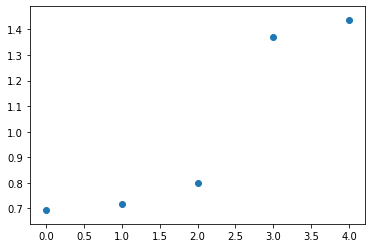

In [35]:
from matplotlib import pyplot as plt
%matplotlib inline
#plot the projected documents -we know that there are two clusters by looking at the documents
#and we see the same in the new projection

# select the eigen values : the importance of the eigen vectors
plt.scatter(list(range(len(S))),S)

# the 2 in the top right are importants (keep most of the information).
# The ones that are in bottom left, are not so important (do not keep much informations)
# SVD standard algo is a compression algorithme. Eigen values 
# Applied to text : Latent Sementic Analysis (LSA), the idea is to remove the feature with less useful.

# Highter the eigen value is, the most important the feature is.
# so more informative dimmenssions are the last 2 ones.

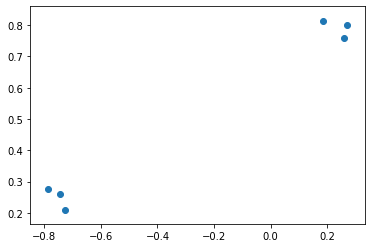

In [37]:
# We apply the dimension reduction now
compressed_data=matrix@V.T  # matrix product : matrix . vectorV(transposed)
plt.scatter(compressed_data[:,-2],compressed_data[:,-1])

#-2 & -1 because we want to keep only the 2 last dimenssions more informative that are in the right (column 3 & 4)
# we keep the 2 main dimenssions.
# We visualize the documents (each points) on the reduced 2 "best" (more informative) axis.

##### Opinion Mining

We will use the tools displayed above and apply them  to analyze reviews about movies (e.g., obtained from  [IMDb](http://www.imdb.com/), an online database of information related to films and television programs). We will follow a text categorization (or classification) approach to infer if a review is positive or negative. 

##### Dataset Description
The dataset that will be used in the lab consists of movie reviews. As you may have observed, in movie review websites like IMDb, any user can write her own review for a particular movie or television show. For example, the following figure shows the review that a user gave to the movie "Midnight in Paris". As we see, the opinion of this user for the movie is positive.

<img src="figures/imdb_review.png"> 

Here, we will consider such a dataset, where each review has been characterized as *positive* or *negative*. The data is contained in the `movie_reviews.csv` file. The file is composed of 1,959 reviews (one per line) and each one has been characterized as positive or negative. Below you are given a function that loads the data and their labels from the disk.

##### Description of the Task and the Pipeline

Our goal is to build a system that, given the review text of a movie, it will be able to predict if the opinion of the user is positive or negative. We will treat the problem as a classification task, where the goal is predict the class label, i.e., positive or negative, for a given review. 

<img src="figures/outline.png"> 

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string

data=pd.read_csv('data/movie_reviews.csv',header=None)
data.columns=['text','label']

In [156]:
data.head(5)

,text,label
0,This movie is really not all that bad. But the...,positive
1,Vanilla Sky was a wonderfully thought out movi...,positive
2,Joseph Brady and Clarence Doolittle are two sa...,positive
3,10 ITEMS OR LESS was made in two weeks on a sh...,positive
4,I saw this movie first on the Berlin Film Fest...,positive


In [157]:
import nltk
#nltk.download()
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [158]:
# data preprocessing
############
data['label']=data['label'].map({"positive":1,"negative":0})
#data=data.fillna("") #null replacement
data=data[data["text"].notnull()]
data.head(2)

,text,label
0,This movie is really not all that bad. But the...,1
1,Vanilla Sky was a wonderfully thought out movi...,1


In [159]:
# preprocess the data and stem them

# remove ponctuation : map take a dictionary for possible values and give the replacement value
punctuation=set(string.punctuation)

data["clean_text"]=data["text"].map(
        lambda x: ''.join([c   for c in x.lower() if c not in punctuation]) # keep c char only if it's not a punctuation
        )  
# ''.join() is to create a String from a list of caracters : ''.join(['c','h','r']) = "chr"

# Stemming
stemmer=SnowballStemmer("english") # could use : PorterStemmer
stopW = stopwords.words("english")

data["clean_text"]=data["clean_text"].map(
        lambda x:" ".join([stemmer.stem(word) for word in x.split() if word not in stopW])
        )
data["clean_text"].head()

0    movi realli bad movi genr right alley sure set...
1    vanilla sky wonder thought movi rather abr los...
2    joseph bradi clarenc doolittl two sailor fourd...
3    10 item less made two week shoestr budget writ...
4    saw movi first berlin film festiv never seen h...
Name: clean_text, dtype: object

In [160]:
# feature extraction
tfidfModel=TfidfVectorizer().fit(data['text'])
matrix=tfidfModel.transform(data['text'])
tfidf_matrix = matrix.todense()
print("Size of TF-IDF matrix: ", tfidf_matrix.shape)  
print("Sparsity of the TF_IDF matrix: ", (float(np.count_nonzero(tfidf_matrix)) / (tfidf_matrix.shape[0] * tfidf_matrix.shape[1])))  

Size of TF-IDF matrix:  (1959, 25083)
Sparsity of the TF_IDF matrix:  0.005443448933817419


##### build model  and evaluate the classification resutls

For the evaluation of the classification results, we will compute the precision, recall and f1-score (combination of precision and recall) defined as follows:

$$ \text{precision} = \dfrac{TP}{TP + FP}, ~~~~~~~~ \text{recall} = \dfrac{TP}{TP + FN}, ~~~~~~~~~  F_1=2 \cdot \dfrac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}} $$

- Split data to training and testing for evaluation.
- Use Logistic Regression classifier as your model
- Print evaluation

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [162]:
X_df=data.copy()
X_df.drop(['text'],axis=1,inplace=True)
X_df.head()

,label,clean_text
0,1,movi realli bad movi genr right alley sure set...
1,1,vanilla sky wonder thought movi rather abr los...
2,1,joseph bradi clarenc doolittl two sailor fourd...
3,1,10 item less made two week shoestr budget writ...
4,1,saw movi first berlin film festiv never seen h...


In [163]:
y_df=X_df["label"]
X_df.drop(['label'],axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y_df, test_size=0.2, random_state=42)
# Using the matrix of the 'tfids' as inputs

In [164]:
model=LogisticRegression(solver='lbfgs')
# Previous TD :
#logreg = LogisticRegression(C=1.)
#logreg.fit(features_train, target_train)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [165]:
y_predicted = model.predict(X_test)
accuracy_score(y_test, y_predicted)

print("accuracy score :"+str(accuracy_score(y_test, y_predicted)))

accuracy score :0.7933673469387755


In [166]:
model.score(X_test, y_test)

0.7933673469387755

In [167]:
print(classification_report(y_test, y_predicted))

# 
#
#

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       200
           1       0.78      0.80      0.79       192

    accuracy                           0.79       392
   macro avg       0.79      0.79      0.79       392
weighted avg       0.79      0.79      0.79       392



USE LSA AND RE-EVALUATE

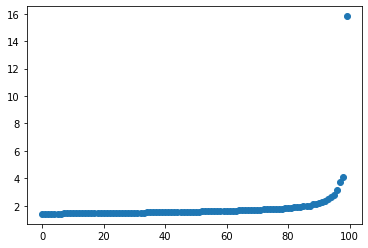

In [168]:
rank = 100

U, S, V = scipy.sparse.linalg.svds(matrix,k=rank) # keep the first 'rank'

plt.scatter(list(range(len(S))),S)

In [169]:
# We apply the dimension reduction now
reduced_tfidf_matrix = np.dot(np.dot(U[:,:rank], np.diag(S)[:rank, :rank]),V[:rank,:])

#plt.scatter(reduced_tfidf_matrix[:,-2],reduced_tfidf_matrix[:,-1])

#-2 & -1 because we want to keep only the 2 last dimenssions more informative that are in the right (column 3 & 4)
# we keep the 2 main dimenssions.
# We visualize the documents (each points) on the reduced 2 "best" (more informative) axis.

In [171]:
X_df=data.copy()
X_df.drop(['text'],axis=1,inplace=True)
X_df.head()

y_df=X_df["label"]
X_df.drop(['label'],axis=1,inplace=True)

# Then, here we use the transformed matrix instead of the standard one.
X_train, X_test, y_train, y_test = train_test_split(reduced_tfidf_matrix, y_df, test_size=0.2, random_state=42)

model=LogisticRegression(solver='lbfgs')
model.fit(X_train,y_train)
y_predicted = model.predict(X_test)
accuracy_score(y_test, y_predicted)

print("accuracy score :"+str(accuracy_score(y_test, y_predicted)))

accuracy score :0.7959183673469388


### Graph of Words

We will next employ an alternative document representation. Specifically, we will represent each movie review as a statistical *graph-of-words*. The construction of each graph is usually preceded by a preprocessing phase (we have already preprocessed our reviews). Each processed document is then transformed into a directed graph whose vertices represent unique terms and whose edges represent co-occurrences between the connected terms within  a fixed-size window. In contrast to the *bag-of-words* representation, the graph-of-words representation models both the terms (vertices), and the relationships between them (edges).

We next give you a function that generates the graph-of-words representation of a single document.

- Use this function as a featuerr extraction from our documents. Set the size of the sliding window equal to 3.
- Print the number of nodes and the number of the edges of the graph-of-words representation (use the  <a href='https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.number_of_nodes.html#networkx.Graph.number_of_nodes'>`number_of_nodes()`</a> and <a href='https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.number_of_edges.html#networkx.Graph.number_of_edges'>`number_of_edges()`</a> functions of NetworkX).
- Visualize the graph.

In [172]:
X_df

,clean_text
0,movi realli bad movi genr right alley sure set...
1,vanilla sky wonder thought movi rather abr los...
2,joseph bradi clarenc doolittl two sailor fourd...
3,10 item less made two week shoestr budget writ...
4,saw movi first berlin film festiv never seen h...
...,...
1955,sad lucian pintili stop make movi get wors eve...
1956,ive never seen santa slasher seri ie silent ni...
1957,went movi expect concis movi relat effect son ...
1958,tooth fairi set small town somewher northern c...


Number of nodes: 32
Number of edges: 67


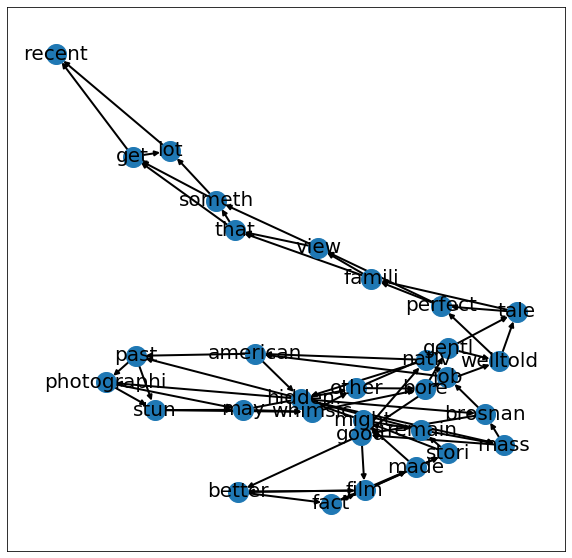

In [173]:
import networkx as nx
import matplotlib.pyplot as plt
from nltk.stem.porter import *
%matplotlib inline

# Create the graph of Consécutive words at a distance of 'window_size'
def create_graph_of_words(doc, window_size):
    tokens = doc.split()
    n = len(tokens)
    G = nx.DiGraph()
    for i in range(n):
        for j in range(i+1,i+window_size):
            if j < n and tokens[i] != tokens[j]:
                G.add_edge(tokens[i], tokens[j])
    return G

G = create_graph_of_words(X_df.values[812,0], 3) # [812,0] : 0 is the cleaned text in X_df
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

plt.figure(figsize=(10,10))
nx.draw_networkx(G, width=2, node_size=400, font_size=20)

In [184]:
X_df

,clean_text
0,movi realli bad movi genr right alley sure set...
1,vanilla sky wonder thought movi rather abr los...
2,joseph bradi clarenc doolittl two sailor fourd...
3,10 item less made two week shoestr budget writ...
4,saw movi first berlin film festiv never seen h...
...,...
1955,sad lucian pintili stop make movi get wors eve...
1956,ive never seen santa slasher seri ie silent ni...
1957,went movi expect concis movi relat effect son ...
1958,tooth fairi set small town somewher northern c...


In [174]:
Gs = list() # graph list
window_size = 3 # nombre de mots qui se suivent 
# dont forget to clean out data

for doc in X_df["clean_text"].values :
    Gs.append(create_graph_of_words(doc,window_size))


#### Feature extraction
We will next extract some features from our set of graphs and we will use these features to perform classification. Specifically, we will use the following three features: (i) nodes, (ii) paths of length 2, and (iii) triangles (i.e., directed cycles of length 3).

The code below extracts all these features from the list of graphs. The features are stored in the `features` dictionary which maps each feature to a unique integer value. Nodes are represented by their names, paths of length 2 are represented as tuples (node 1, node 2), and triangle are also represented as tuples (node 1, node 2, node 3).

In [176]:
features = dict()

# for all graphes
# for all nodes in graph
for i,G in enumerate(Gs):
    for n1 in G.nodes():
        if n1 not in features:
            features[n1] = len(features)
        for n2 in G.successors(n1):
            if (n1,n2) not in features:  # 2 words
                features[(n1, n2)] = len(features)
            for n3 in G.successors(n2):
                if n1 != n3 and G.has_edge(n3, n1):
                    if (n1,n2,n3) not in features: # 3 words
                        features[(n1, n2, n3)] = len(features)

In [177]:
features

{'movi': 0,
 ('movi', 'realli'): 1,
 ('movi', 'realli', 'bad'): 2,
 ('movi', 'bad'): 3,
 ('movi', 'genr'): 4,
 ('movi', 'right'): 5,
 ('movi', 'youll'): 6,
 ('movi', 'love'): 7,
 'realli': 8,
 ('realli', 'bad'): 9,
 ('realli', 'bad', 'movi'): 10,
 ('realli', 'movi'): 11,
 ('realli', 'decent'): 12,
 ('realli', 'br'): 13,
 ('realli', 'br', 'cheap'): 14,
 'bad': 15,
 ('bad', 'movi'): 16,
 ('bad', 'movi', 'realli'): 17,
 ('bad', 'genr'): 18,
 'genr': 19,
 ('genr', 'right'): 20,
 ('genr', 'alley'): 21,
 'right': 22,
 ('right', 'alley'): 23,
 ('right', 'sure'): 24,
 'alley': 25,
 ('alley', 'sure'): 26,
 ('alley', 'set'): 27,
 'sure': 28,
 ('sure', 'set'): 29,
 ('sure', 'cheap'): 30,
 ('sure', 'didbr'): 31,
 ('sure', 'br'): 32,
 'set': 33,
 ('set', 'cheap'): 34,
 ('set', 'realli'): 35,
 'cheap': 36,
 ('cheap', 'realli'): 37,
 ('cheap', 'realli', 'br'): 38,
 ('cheap', 'decent'): 39,
 ('cheap', 'decent', 'br'): 40,
 ('cheap', 'futurist'): 41,
 ('cheap', 'postapocalypt'): 42,
 'decent': 43,
 ('d

In [178]:
from scipy.sparse import lil_matrix

X = lil_matrix((len(Gs), len(features)))
#X are the features

In [179]:
#fill in X 
for i,G in enumerate(Gs):
    for n1 in G.nodes():
        X[i,features[n1]]+=1 # we count them
        for n2 in G.successors(n1):
            # If 2 words are connected
            X[i,features[(n1,n2)]]+=1 # We count the combinations of the 2
            for n3 in G.successors(n2):
                if n1 != n3 and G.has_edge(n3, n1): # Here we check for a triangle : n1->n2->n3 but with also n3->n1
                    X[i,features[(n1,n2,n3)]]+=1
                    
# Then, here we have X that is a matrix of combinations 


In [182]:
#features

In [180]:
# Then, here we use the transformed matrix instead of the standard one.
X_train, X_test, y_train, y_test = train_test_split(X, y_df, test_size=0.2, random_state=42)

model=LogisticRegression(solver='lbfgs')
model.fit(X_train,y_train)
y_predicted = model.predict(X_test)
accuracy_score(y_test, y_predicted)

print("accuracy score :"+str(accuracy_score(y_test, y_predicted)))

accuracy score :0.8673469387755102


Perform evaluation on X